In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
heart_csv=pd.read_csv('heart_statlog_cleveland_hungary_final (1).csv')
heart_csv.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [3]:
duplicated=heart_csv.duplicated().sum()
if duplicated:
    print('Duplicated rows in dataset are : {}'.format(duplicated))
else:
        print('no values duplicated in dataset')

Duplicated rows in dataset are : 272


In [4]:
heart_csv = heart_csv.drop_duplicates()

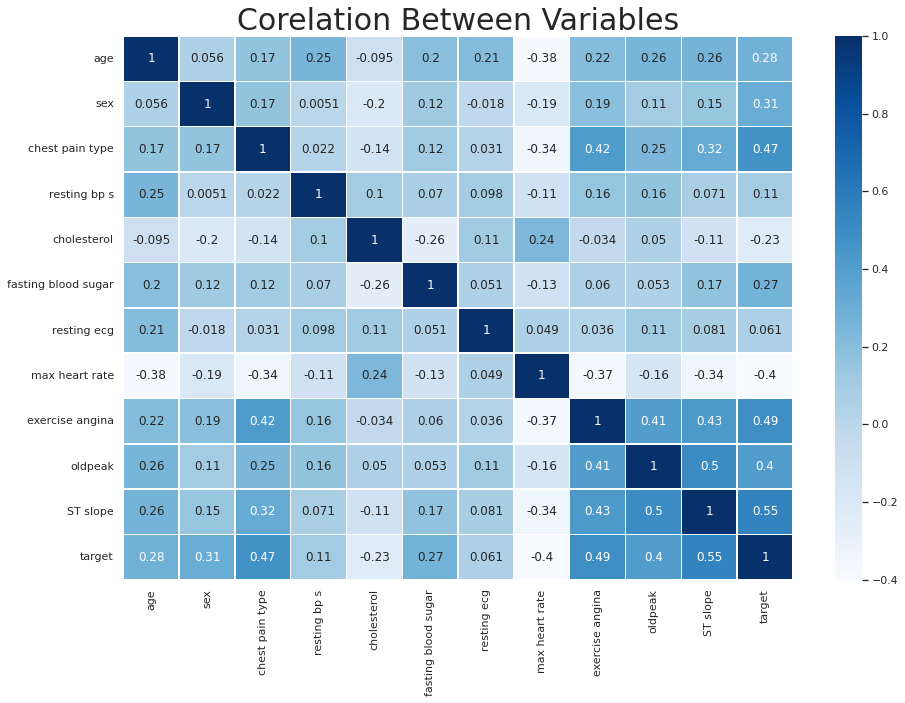

In [5]:
sns.set(style="white") 

plt.rcParams['figure.figsize'] = (15, 10) 

sns.heatmap(heart_csv.corr(), annot = True, linewidths=.5, cmap="Blues")

plt.title('Corelation Between Variables', fontsize = 30)

plt.show()

In [6]:
y = heart_csv['target']

X = heart_csv.drop(['target'], axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26330471, 0.12937479, 0.11168144, 0.08651147, 0.080459  ,
       0.07866137, 0.06486006, 0.05655208, 0.04773448, 0.04498809,
       0.0358725 ])

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
pred_train = classifier.predict(X_train)

score_train = accuracy_score(y_train,pred_train)

print('Accuracy:{0:f}'.format(score_train))

Accuracy:0.848774


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
pred_test = classifier.predict(X_test)

score_test =accuracy_score(y_test,pred_test)
cm = confusion_matrix(y_test, pred_test)
print(cm)
print(accuracy_score(y_test, pred_test))

[[59 15]
 [13 97]]
0.8478260869565217
